Data Analytics Project Description

This data analytics project centers around direct marketing campaigns conducted by a Portuguese banking institution through phone calls. The primary objective is to glean valuable insights and descriptive patterns within the dataset, with a specific focus on predicting client subscription to a term deposit, denoted by the variable 'y.'

Bank Client Data:

1. Age (numeric)
2. Job: Type of job (categorical): 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'.
3. Marital: Marital status (categorical): 'divorced', 'married', 'single', 'unknown' (Note: 'divorced' signifies divorced or widowed).
4. Education: Education level (categorical): 'basic.4y', 'basic.6y', 'basic.9y', 'high school', 'illiterate', 'professional course', 'university degree', 'unknown'.
5. Default: Has credit in default? (categorical): 'no', 'yes', 'unknown'.
6. Housing: Has a housing loan? (categorical): 'no', 'yes', 'unknown'.
7. Loan: Has a personal loan? (categorical): 'no', 'yes', 'unknown'.
8. Contact: Contact communication type (categorical): 'cellular', 'telephone'.
9. Month: Last contact month of the year (categorical): 'jan', 'feb', 'mar', …, 'nov', 'dec'.
10. Day_of_week: Last contact day of the week (categorical): 'mon', 'tue', 'wed', 'thu', 'fri'.
11. Duration: Last contact duration, in seconds (numeric). Note that this attribute significantly affects the target variable but should be included primarily for benchmarking purposes.

Other Attributes:

12. Campaign: Number of contacts made during this campaign and for this client (numeric, includes the last contact).
13. Pdays: Number of days passed since the client was last contacted from a previous campaign (numeric; 999 indicates the client was not previously contacted).
14. Previous: Number of contacts made before this campaign and for this client (numeric).
15. Poutcome: Outcome of the previous marketing campaign (categorical): 'failure', 'nonexistent', 'success'.

Output Variable (Desired Target):

16. Y: Indicates whether the client subscribed to a term deposit (binary): 'yes', 'no'.

Inspiration for Data Analysis:
This dataset offers numerous opportunities for insightful data analysis, including:

1. Descriptive Analysis: Perform descriptive statistics and exploratory data analysis to understand the distribution and relationships between variables.

2. Segmentation Analysis: Segment the data to understand how different customer groups respond to marketing campaigns.

3. Temporal Patterns: Explore temporal trends in marketing campaign success by analyzing month and day of the week effects.

4. Customer Profiling: Create customer profiles based on job, marital status, education, and other attributes.

5. Contact Strategy Evaluation: Analyze the influence of contact duration and past campaign outcomes on subscription rates.

This data analytics project provides a platform for unraveling valuable insights from the direct marketing campaigns, aiding the banking institution in refining its strategies for term deposit subscriptions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import plotly.express as px
from datetime import datetime
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Loading and Data Exploration

Loading the Data from Our CSV file

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/bank-full.csv",low_memory=False)
data.head(5)

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.tail()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Checking for the empty cell if any

* Luckly we do not have any empty cells

In [ ]:
# To count the number of empty cells in the columns
empty=data.isnull().sum()
empty

Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
Contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
Poutcome     0
Y            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  int64 
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   Contact    45211 non-null  object
 9   Day        45211 non-null  int64 
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  int64 
 12  Campaign   45211 non-null  int64 
 13  Pdays      45211 non-null  int64 
 14  Previous   45211 non-null  int64 
 15  Poutcome   45211 non-null  object
 16  Y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


* <b>Mean Age</b> is 41 years Old. The Minimum age is 18 years old and oldest is 95 years old.

* <b>Mean Balance</b> is 1,362 and the Max Balance is 102,127  and the standard deviation is 3,044

* <b>Mean Day</b> is 15 days and the highest number of days is 31 days

* The Dataset Contains Over 45,211 rows and Over 17 Columns

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

# Descriptive Analysis

## Personal Loan Status Analysis

Within the dataset, **7,244 individuals** have opted for personal loans, while a larger group of **37,967** have not taken out any loans. The percentage of individuals with existing loans is approximately **16.02%**.
- This suggests that the conversion rate for personal loans is not as optimal as anticipated, indicating a relatively lower uptake among the surveyed individuals.
- Further analysis and strategies may be needed to enhance the appeal or accessibility of personal loans.

In [ ]:
loan_by=data['Loan'].value_counts()
loan_by

no     37967
yes     7244
Name: Loan, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

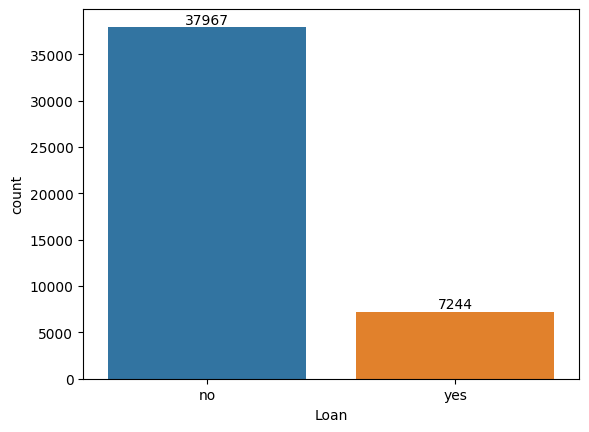

In [ ]:
ax=sns.countplot(data=data, x='Loan')

#To add label on the bar chart
for i in ax.containers:
    ax.bar_label(i,)
plt.show

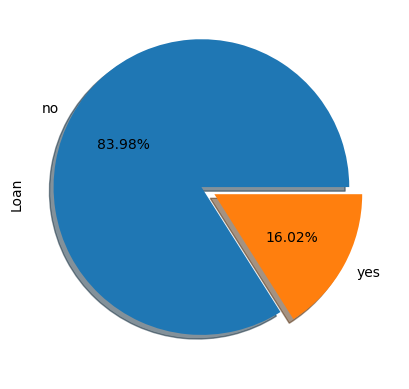

In [ ]:
data.Loan.value_counts().plot(kind='pie',explode=(0.1,0),shadow = True, autopct="%1.2f%%")
plt.show()

In [ ]:
subscription_counts = data['Y'].value_counts()
subscription_counts

no     39922
yes     5289
Name: Y, dtype: int64

In [ ]:
overall_subscription_rate = data['Y'].value_counts(normalize=True)['yes']
print(f"Overall Subscription Rate: {overall_subscription_rate:.2%}")


Overall Subscription Rate: 11.70%


## Term Deposit Subscription Analysis
- The dataset provides insights into the subscription status of term deposits among clients:

### Subscription Counts:

Clients subscribing to term deposits amount to **5,289 individuals**, constituting approximately **11.70%** of the total.
 Conversely, **39,922 individuals (88.3%)** opted not to subscribe.


### Educational Qualification Influence:

Analyzing the relationship between educational qualifications and term deposit subscriptions reveals that the majority of subscribers possess a **Secondary Education level**. This is followed by individuals with **Tertiary Education**, and the lowest subscription rate is observed among clients with **Primary Education** qualifications.


It therefore suggests that there may be a potential correlation between educational qualifications and the likelihood of subscribing to term deposits. Further exploration and targeted strategies may enhance subscription rates among specific educational groups.


### **Note: Term deposits refer to fixed-term investments with varying durations.**

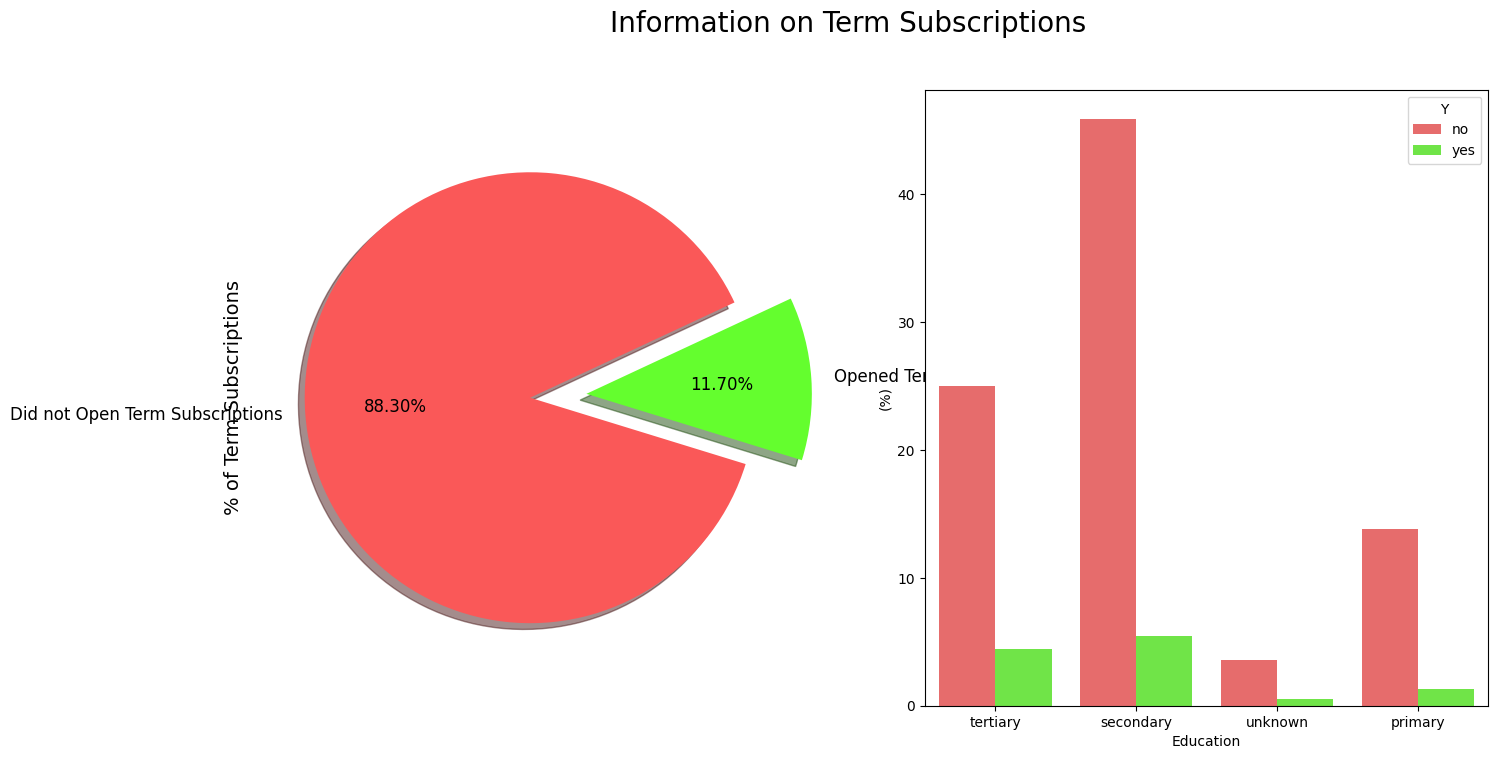

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

colors = ["#FA5858", "#64FE2E"]
labels = "Did not Open Term Subscriptions", "Opened Term Subscriptions"

plt.suptitle('Information on Term Subscriptions', fontsize=20)

# Pie chart for the distribution of 'Y' (term subscription)
data["Y"].value_counts().plot.pie(explode=[0, 0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% of Term Subscriptions', fontsize=14)
palette = sns.color_palette(colors)

#sns.countplot(x='Loan', data=data, ax=ax[1], palette=colors)  # Specify 'x' for the column you want to count
#ax[1].set_title('Condition of Loans', fontsize=20)
#ax[1].set_xticklabels(['no', 'yes'], rotation='horizontal')

# Barplot shows 'education' vs. 'balance' with hue 'Y' (term subscription)
sns.barplot(x="Education", y="Balance", hue="Y", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["Education"].unique(), rotation=0, rotation_mode="anchor")

plt.show()

## Job Distribution

* In the dataset, individuals employed in Blue-Collar Jobs comprise the largest group, totaling  <b>9,732</b>.
* Following closely are those engaged in Management roles, accounting for  <b>9,458 </b>  individuals. The smallest segment consists of Students, with a count of  <b>938</b>.

In [ ]:
data['Job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: Job, dtype: int64

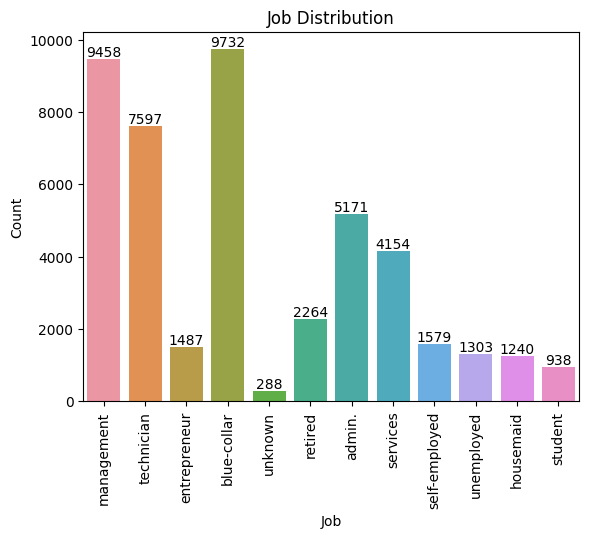

In [ ]:
#Bar plot of job distribution
ax=sns.countplot(data=data, x='Job')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
#To add label on the bar chart
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
# Admin and management are basically the same let's put it under the same categorical value
lst = [data]

for col in lst:
    col.loc[col["Job"] == "admin.", "Job"] = "management"


## Distribution Of Age By Occupations

- Indicates that the age distribution for **Management**, **Entrepreneur**, and **Retired** Clients is higher than the other occupations, with a median age around <b>60 years old</b>. On the other hand, the age distribution for the Student occupation is the lowest, with a median age around <b>20 years old.</b>


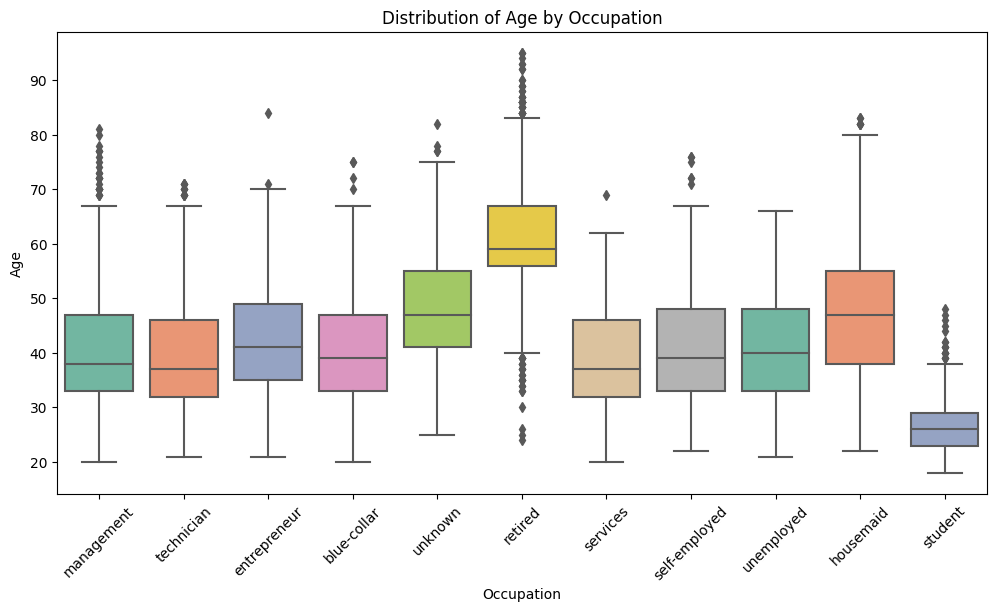

In [ ]:
#Box plot to show the distribution of age by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job', y='Age', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Distribution of Age by Occupation')
plt.show()


## Distribution of Account Balance by Job Occupation

* Box Plot Analysis: Patterns based on account balance reveal distinct trends. Individuals in management roles consistently exhibit the highest account balances, while students tend to have the lowest balances.

- **Median Balance:**
    The median balance across all clients in the dataset is **1,362**.

- **Highest and Lowest Balances**:
    The client with the highest balance, **102,127**, works in a management role.
    The client with the lowest balance, **-8,019**, is employed in a blue-collar job.


- **Average Balances**:

    Only two job categories have average balances above the overall average:
    Management (1,763)
    Retired (1,984 )


- **Recommendation for Marketing Campaign**:

    To enhance the effectiveness of the marketing campaign, I propose targeting clients who are retired or employed in management roles. This is based on the observation that these groups tend to have and maintain higher bank balances.

    This targeted approach aligns with the goal of optimizing the marketing strategy by focusing efforts on individuals more likely to have disposable income or higher financial stability. It's a strategic move to increase the chances of success in the campaign.

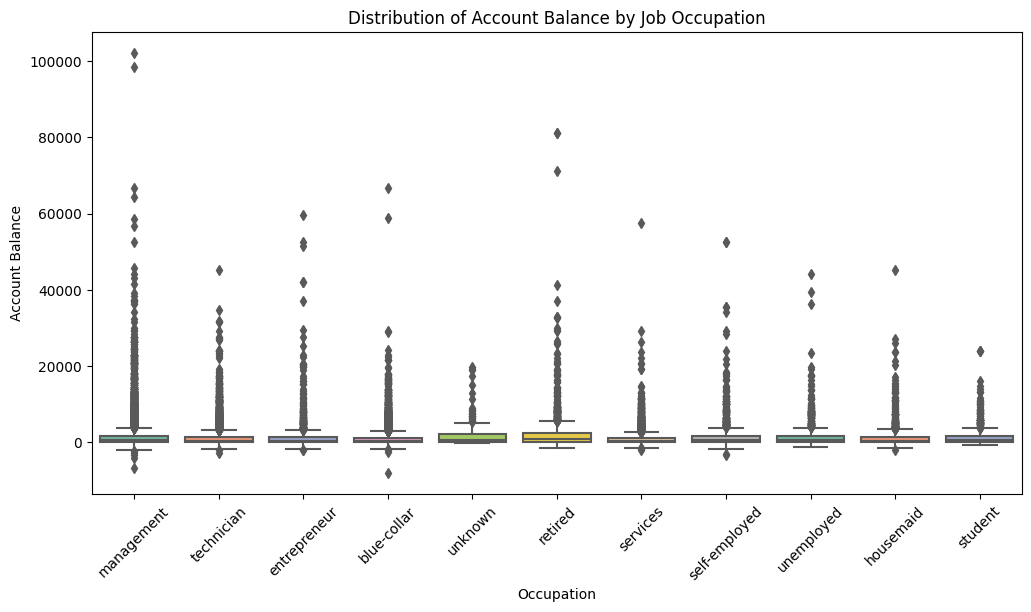

In [ ]:
# Box plot to show the distribution of account balance by job occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job', y='Balance', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Occupation')
plt.ylabel('Account Balance')
plt.title('Distribution of Account Balance by Job Occupation')
plt.show()

In [ ]:
medians = data.groupby('Job')['Balance'].median().sort_values()
nobs = data['Job'].value_counts().sort_index()

In [ ]:

grouped_data = data.groupby('Job')['Balance'].agg(['count', 'min', 'max', 'mean']).reset_index()
grouped_data.columns = ['Job', 'Count', 'Min Balance', 'Max Balance', 'Avg Balance']


print(grouped_data)


              Job  Count  Min Balance  Max Balance  Avg Balance
0     blue-collar   9732        -8019        66653  1078.826654
1    entrepreneur   1487        -2082        59649  1521.470074
2       housemaid   1240        -1941        45141  1392.395161
3      management  14629        -6847       102127  1541.712421
4         retired   2264        -1598        81204  1984.215106
5   self-employed   1579        -3313        52587  1647.970868
6        services   4154        -2122        57435   997.088108
7         student    938         -679        24025  1388.060768
8      technician   7597        -2827        45248  1252.632092
9      unemployed   1303        -1270        44134  1521.745971
10        unknown    288         -295        19706  1772.357639


### Distribution of Account Balance by Marital Status and Job Occupation


- **Administrative Roles**:

    Among administrators, those who are married tend to have the highest average balance (1,281.41), followed by singles (1,020.74). Divorced administrators have the lowest average balance (878.33).

- **Blue-Collar Workers**:

    Blue-collar workers, whether married (1,113.17) or single (1,056.11), exhibit higher average balances compared to their divorced counterparts (820.81).

- **Entrepreneurs**:

    Married entrepreneurs have the highest average balance (1,643.39), followed by singles (1,248.24), and then divorced individuals (1,155.98).

- **Management Roles**:

    Individuals in management roles, regardless of marital status, generally maintain higher average balances compared to other job categories.

- **Retired Individuals**:

    Retired individuals, especially those who are married (2,140.10), stand out with the highest average balances.

- **Self-Employed Individuals**:

    Divorced self-employed individuals have the highest average balance (2,426.35) among self-employed groups.

- ****


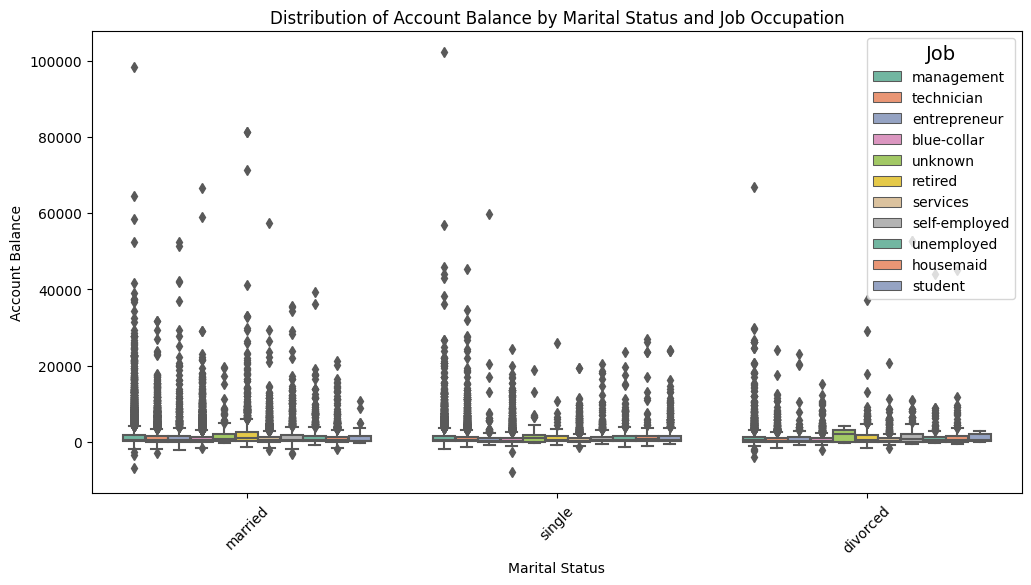

In [ ]:
# Box plot to show the distribution of account balance by marital status and job occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital', y='Balance', hue='Job', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Account Balance')
plt.title('Distribution of Account Balance by Marital Status and Job Occupation')
plt.legend(title='Job', title_fontsize='14', loc='upper right')
plt.show()

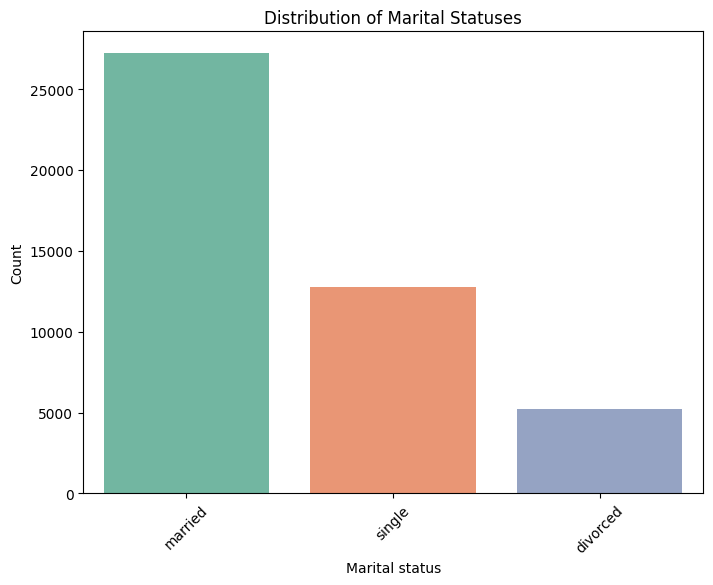

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Marital', palette='Set2')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Distribution of Marital Statuses')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assuming 'Job', 'Balance', and 'Marital' are valid columns in your DataFrame (data)
grouped_data5 = data.groupby(['Job', 'Marital'])['Balance'].agg(['count', 'min', 'max', 'mean']).reset_index()
grouped_data5.columns = ['Job', 'Marital', 'Count', 'Min Balance', 'Max Balance', 'Avg Balance']

print(grouped_data5)


              Job   Marital  Count  Min Balance  Max Balance  Avg Balance
0     blue-collar  divorced    750        -2093        15187   820.806667
1     blue-collar   married   6968        -1725        66653  1113.165901
2     blue-collar    single   2014        -8019        24277  1056.105263
3    entrepreneur  divorced    179         -934        22946  1155.983240
4    entrepreneur   married   1070        -2082        52499  1643.387850
5    entrepreneur    single    238         -961        59649  1248.235294
6       housemaid  divorced    184         -621        45141  1573.222826
7       housemaid   married    912        -1941        21244  1248.173246
8       housemaid    single    144        -1006        26965  2074.743056
9      management  divorced   1861        -4057        66721  1319.951639
10     management   married   8093        -6847        98417  1646.224762
11     management    single   4675        -1980       102127  1449.066096
12        retired  divorced    425    

## Correlation Between Age and Balance

- It suggests that age and balance have a weak correlation in the dataset, indicating that age alone may not be a strong predictor of account balances.

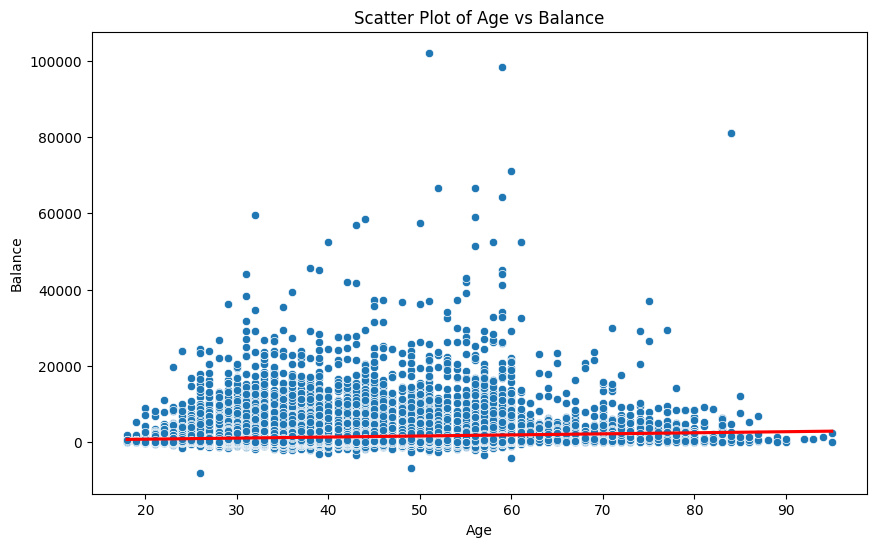

In [ ]:
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', data=data)
plt.title('Scatter Plot of Age vs Balance')

# Regression line
sns.regplot(x='Age', y='Balance', data=data, scatter=False, color='red', ci=None)
plt.xlabel('Age')
plt.ylabel('Balance')

plt.show()

## The Distribution of Marital statuses in our dataset.

* The dataset indicates a predominant presence of married individuals, followed by singles in terms of marital statuses.

The graph is a box and whisker plot that shows the distribution of account balances across different marital statuses and job occupations.

- **Marital Status**: The x-axis represents the marital status, divided into three categories: married, single, and divorced.
- **Account Balance**: The y-axis represents the account balance, ranging from 0 to 100,000.
- **Job Occupations**: Different colors represent different job occupations, such as technician, blue-collar, entrepreneur, retired, services, unemployed, housemaid, and student.
- **Box and Whisker Plot**: The boxes represent the interquartile range (middle 50% of the data), the whiskers represent the minimum and maximum values (excluding outliers), and the dots represent outliers.

- This graph to understand the relationship between marital status, job occupation, and account balance. For example, we can identify which marital status and job occupation combinations tend to have higher or lower account balances.

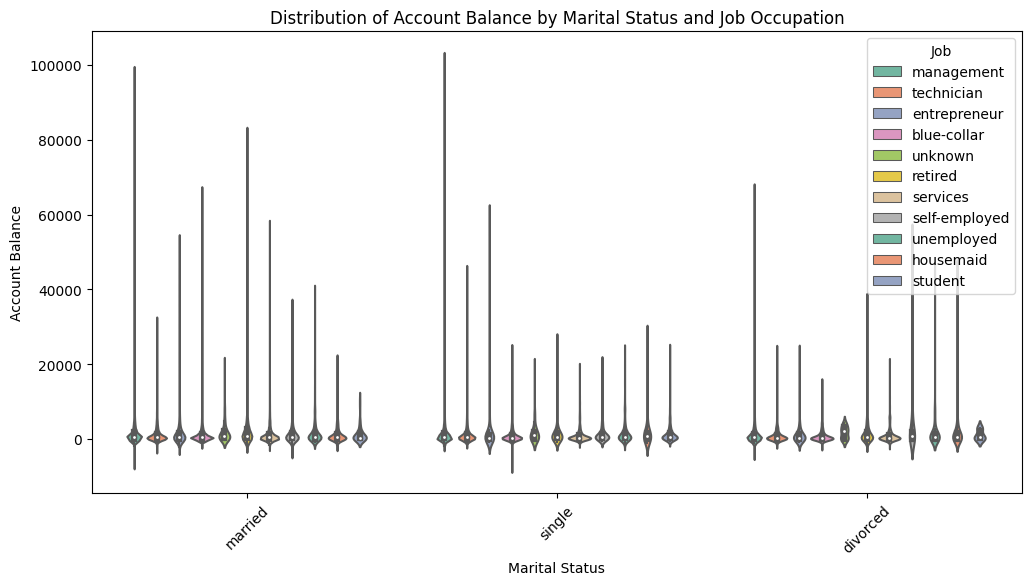

In [ ]:
# Violin plot to show the distribution of account balance by marital status and job occupation
plt.figure(figsize=(12, 6))
sns.violinplot(x='Marital', y='Balance', hue='Job', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Account Balance')
plt.title('Distribution of Account Balance by Marital Status and Job Occupation')
plt.show()

## The Different Education Levels Among Our Clients In the Dataset.

- Within our dataset, a significant portion of clients has completed secondary education, totaling **23,202**. Following this, individuals with tertiary education stand at **13,301**, and those with primary education are represented by **6,851**.






In [ ]:
data['Education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: Education, dtype: int64

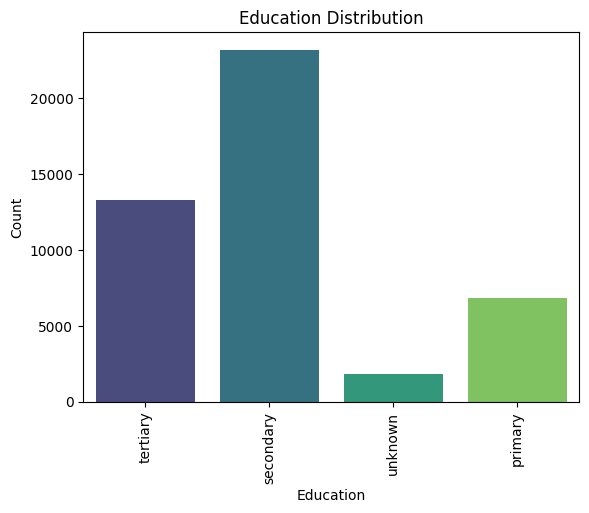

In [ ]:
#Bar plot of Education distribution
sns.countplot(data=data, x='Education',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()


In [ ]:
mar_sub = pd.crosstab(data['Marital'],data['Y'],margins=True,margins_name='Total',normalize='index')* 100
mar_sub = mar_sub.round(2)
mar_sub

Y,no,yes
Marital,,
divorced,88.05,11.95
married,89.88,10.12
single,85.05,14.95
Total,88.30,11.70


In [ ]:
edu_sub = pd.crosstab(data['Education'], data['Y'], margins=True, margins_name='Total', normalize='index') * 100
edu_sub = edu_sub.round(2)  # Round percentages to two decimal places
edu_sub


Y,no,yes
Education,,
primary,91.37,8.63
secondary,89.44,10.56
tertiary,84.99,15.01
unknown,86.43,13.57
Total,88.30,11.70


In [ ]:
Education=data.groupby(["Education","Y"],as_index=False).sum()

In [ ]:
Education.sort_values(by="Education",ascending=False)

,Education,Y,Age,Balance,Day,Duration,Campaign,Pdays,Previous
6,unknown,no,71222,2272712,25336,360915,4768,50243,647
7,unknown,yes,11434,562471,4025,116917,523,18199,260
4,tertiary,no,447771,19178966,183892,2453790,33236,381098,6303
5,tertiary,yes,78864,4209731,30075,984765,4347,137962,2502
2,secondary,no,827656,23121065,328809,4635210,57558,808838,10374
3,secondary,yes,99595,3674479,36835,1366817,5106,173848,2799
0,primary,no,283725,7474166,96415,1380145,18070,213835,2723
1,primary,yes,30500,1096092,9237,373252,1348,33361,629


In [ ]:
Education

,Education,Y,Age,Balance,Day,Duration,Campaign,Pdays,Previous
0,primary,no,283725,7474166,96415,1380145,18070,213835,2723
1,primary,yes,30500,1096092,9237,373252,1348,33361,629
2,secondary,no,827656,23121065,328809,4635210,57558,808838,10374
3,secondary,yes,99595,3674479,36835,1366817,5106,173848,2799
4,tertiary,no,447771,19178966,183892,2453790,33236,381098,6303
5,tertiary,yes,78864,4209731,30075,984765,4347,137962,2502
6,unknown,no,71222,2272712,25336,360915,4768,50243,647
7,unknown,yes,11434,562471,4025,116917,523,18199,260


In [ ]:
# Assuming 'Education' is your DataFrame
education_counts = Education['Education'].value_counts().reset_index()

fig = px.funnel(education_counts, x='Education', y='index', color="Education")
fig.show()

In [ ]:
fig=px.funnel(data,x='Age',y='Job')
fig.show()

###  Median Balance by Educational/Marital Group

To derive a more comprehensive understanding, we grouped the data by both education and marital status to analyze the median balance.

- Notably, individuals who are single and have completed at least tertiary education exhibit the highest median balance. In contrast, those who are divorced and have only completed primary education display the lowest median balance.
- This grouping allows for more nuanced insights to support informed decision-making.

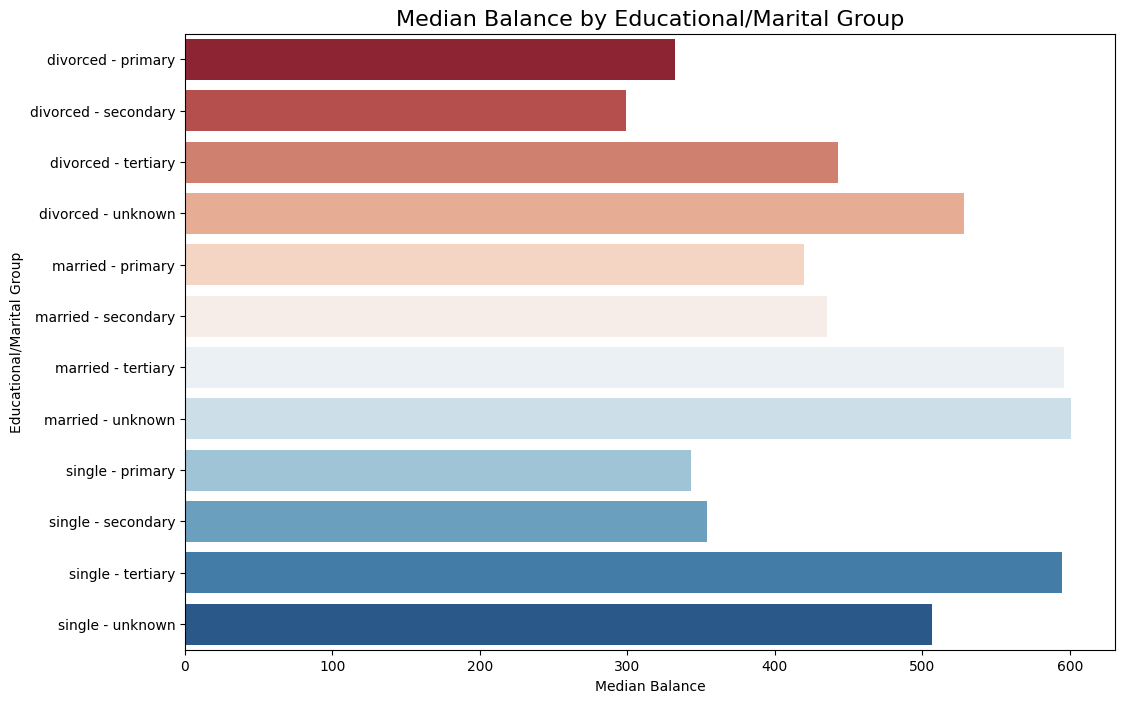

In [ ]:
edu_group=data.groupby(['Marital','Education'],as_index=False)['Balance'].median()
edu_group['Marital_Education'] = edu_group['Marital'] + ' - ' + edu_group['Education']

fig=plt.figure(figsize=(12,8))

sns.barplot(x='Balance',y='Marital_Education',data=edu_group,label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)
plt.xlabel('Median Balance')
plt.ylabel('Educational/Marital Group')
#Text(0.5,1,'Median Balance by Educational/Marital Group')
plt.show()

## The Housing Loan Distribution Among Our Clients

- From the Dataset, we can see the different between those with housing loans.The majority of our clients currently have existing housing loans.

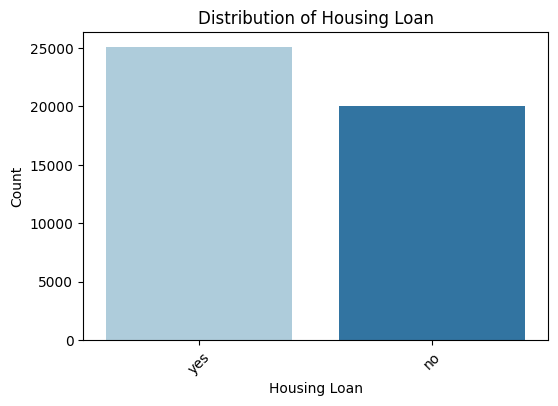

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Housing', palette='Paired')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title('Distribution of Housing Loan')
plt.xticks(rotation=45)
plt.show()

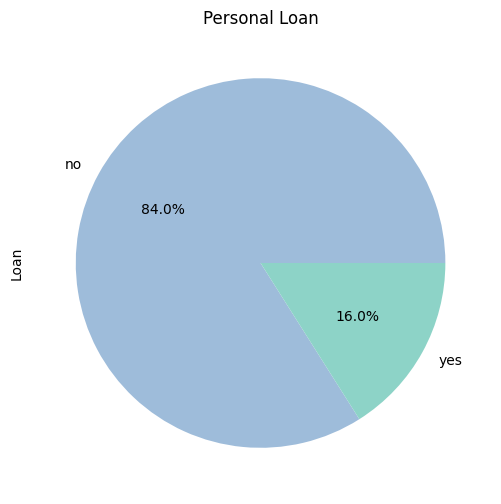

In [ ]:
plt.figure(figsize=(6, 6))
data['Loan'].value_counts().plot.pie(autopct='%1.1f%%',colors=['#9ebcda','#8dd3c7','#bdbdbd'])
plt.title('Personal Loan')
plt.show()

### Most Common Communication Channel for Marketing and Client Communication

- Cellular is the Most Common Means that is Used to reach out to Our Clients.

In [ ]:
data['Contact'].value_counts().idxmax()

'cellular'

In [ ]:
data['Y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: Y, Length: 45211, dtype: object

In [ ]:
# Convert 'Day' and 'Month' to datetime objects
data['Date'] = data.apply(lambda row: datetime.strptime(f"{row['Day']} {row['Month']} 2015", "%d %b %Y"), axis=1)

# Convert 'Date' to days like "Mon - SUN"
data['DayOfWeek'] = data['Date'].dt.strftime('%a')  # %a gives the abbreviated day name



In [ ]:
# Create a DataFrame for better visualization
temporal_data = data.groupby(['Month', 'DayOfWeek'])['Y'].value_counts(normalize=True).unstack()

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x=temporal_data.index.get_level_values('Month'), y=temporal_data['yes'], hue=temporal_data.index.get_level_values('DayOfWeek'))

plt.title('Marketing Campaign Success by Month and Day of the Week')
plt.xlabel('Month')
plt.ylabel('Proportion of Success')
plt.legend(title='Day of the Week', bbox_to_anchor=(1, 1))

plt.show()

IndexingError: ignored

<Figure size 1400x800 with 0 Axes>

### Number of Clients that were contacted in each month.

-Over the span of 10 months, ranging from March to December, our records reveal varying levels of client outreach.
* The month of May experienced the highest client contact, with an impressive **13,769 engagements**. Following closely is July, with **7,174 client** contacts. In contrast, December saw the least amount of client outreach, totaling **182 engagements**.

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', palette='viridis')
plt.title('Number of Clients Contacted in Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
month_counts = data['Month'].value_counts().sort_index()
month_counts

### Last Contact Day of the Week Distribution Analysis.

- Examining the distribution from **Monday** to **Sunday**, the data illustrates that **Thursday**  emerges as the most common day for client contact, closely followed by **Wednesday**.

- Conversely, **Sunday** exhibits the least frequency of client contact, aligning with the perception of it being a weekend day. Notably, **Monday** stands out as an exception to the weekend trend, with a least frequency of client contact.






In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='DayOfWeek',palette='Paired')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Contacts')
plt.title('Distribution of Last Contact Day of the Week')
plt.show()

In [ ]:
#Distribution of age
sns.histplot(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


## Average Duration of Last Contact During the Campaign

- The average duration spent on client calls via cellular communication during the campaign was approximately **4.30 minutes**.

- The maximum duration recorded during these interactions reached as high as **81.97 minutes**.

In [ ]:
average_duration = data['Duration'].mean()
seconds = average_duration   # Replace with your actual number of seconds

# Convert seconds to minutes
minutes = seconds / 60

print(f"{seconds} seconds is equal to {minutes:.2f} minutes")
average_duration # in seconds

In [ ]:
highest_duration = data['Duration'].max()
seconds = highest_duration   # Replace with your actual number of seconds

# Convert seconds to minutes
minutes = seconds / 60

print(f"{seconds} seconds is equal to {minutes:.2f} minutes")


### Number of times that contacts was made with the clients during this campaign for each client

In [ ]:
contact_counts_max = data['Campaign'].max()
print("The max times contacted",contact_counts_max)

contact_counts_mean = data['Campaign'].mean()
print("The Avg times contacted", contact_counts_mean)


### Job and Term Subscription Relationship Analysis

  **Overall Subscription Rate:**
   - Across all job categories, only 11.70% of clients from the dataset subscribe to a term deposit.
   - #### Some Clients that who work in some type of Jobs Have a higher Term Deposit than others.
     - **Students** have the highest term deposit subscription rate at **(28.68%)**, indicating a relatively higher interest in term deposits among this group.This is closely followed by **Retried Clients (22.8%)** who display a significantly lower term deposits than the students,it may primaryly due to their saving been locked up in term deposit, because of the interests that it will gain.Lastly the Blue-Collar with about **7.27%** of those with Blue collar Job Subcricting to Term Despoist

### Key Observations:

- **Occupational Influence:**
  - Job categories such as "Student" and "Retired" appear to show a higher inclination toward term deposit subscriptions. This may be attributed to two factors. Firstly, a larger percentage of students are single and probably have lower expenses, leading them to save more. The higher percentage of term deposits among students does not necessarily indicate higher income; rather, it suggests they have more income leave after expenses to save, also their are single, hence the reduce expenses.
  - On the other hand, retired clients, who typically have higher bank balances, are more inclined to subscribe. This inclination is due to the higher income they earn towards the end of their careers.
- **Income and Subscription:**
  - The relationship between management jobs, higher income, and term deposit subscription suggests that individuals with higher incomes may be more inclined to invest in term deposits.


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Job', hue='Y',palette='Set2')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.title('Term Subscription Counts by Job Type')
plt.xticks(rotation=45)
plt.legend(title='Term Subscription')
plt.show()

In [ ]:
#job_sub = pd.crosstab(data['Job'], data['Y'], margins=True, margins_name='Total')
#job_sub

job_sub = pd.crosstab(data['Job'], data['Y'], margins=True, margins_name='Total', normalize='index') * 100
job_sub = job_sub.round(2)  # Round percentages to two decimal places
job_sub


In [ ]:

#segment_subscription_rates = data.groupby(['Job'])['Y'].value_counts(normalize=True).unstack().fillna(0)*100
#print("Subscription Rates Across Different Segments:\n", segment_subscription_rates)


In [ ]:
peak_times = pd.crosstab(index=[data['Month'], data['DayOfWeek']], columns=data['Y'], normalize='index') * 100
peak_times = peak_times.sort_values(by='yes', ascending=False)  # Sort by 'yes' (subscription) in descending order
peak_times.head(40)

In [ ]:
# Python
peak_times = data.groupby(['Month', 'DayOfWeek'])['Y'].value_counts(normalize=True).unstack().fillna(0)*100
peak_times.head(40)


In [ ]:
peak_times

In [ ]:
data['Marital'].value_counts()

###  Distribution of Account Balance By Marital Status

* There exist a relationship between Marital Status and Income(Balance), Single persons tend to have a higher account balance then those who are married and Divorced

In [ ]:
# box plot to show the distribution of account balance by marital status and job occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Marital', y='Balance', hue='Job', data=data, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Marital Status')
plt.ylabel('Account Balance')
plt.title('Distribution of Account Balance by Marital Status and Job Occupation')
plt.legend(title='Job', title_fontsize='14', loc='upper right')
plt.show()


In [ ]:
unique_jobs = data['Job'].unique()
unique_marital_statuses = data['Marital'].unique()
unique_education_levels = data['Education'].unique()


print('The Unique Jobs are as follows',unique_jobs)
print('The Marital Statues are',unique_marital_statuses)
print('Unique Educatation are',unique_education_levels)


In [ ]:
# Create a new categorical variable that combines 'Marital' and 'Education'
data['Marital_Education'] = data['Marital'] + ' - ' + data['Education']

# Create a pair plot with color based on the 'Marital_Education' variable
sns.set(style='ticks')
sns.pairplot(data, hue='Marital_Education', palette='Set1')
plt.show()

### Data Visualization

Distribution of Age

## Job Distribution

In [ ]:
#Bar plot of job distribution
sns.countplot(data=data, x='Marital')
plt.xticks(rotation=90)
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()





In [ ]:
# Correlation
correlation_coefficient, p_value = pearsonr(data['Age'], data['Balance'])
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.4f}')

# Regression
X = sm.add_constant(data['Age'])  # Adding a constant for the intercept
y = data['Balance']

model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())

In [ ]:
# Crosstab of Marital status and Subscription
marital_subscription = pd.crosstab(index=data['Marital'], columns=data['Y'])
print(marital_subscription)


In [ ]:
# Relationship Between Balance and Education

balance_edu = pd.crosstab(index=data['Campaign'], columns=data['Education'])
balance_edu.head()

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Job', 'Marital', 'Education'], drop_first=True)
data_encoded

## Using SQL to Perform Data Analysis

In [ ]:
## importing dependencies

import sqlite3

In [ ]:
## COnnecting to Database

conn = sqlite3.connect(':memory:')
c = conn.cursor()

In [ ]:
# Converting the Dataframe to SQl
data.to_sql('data',conn ,if_exists='replace',index=False)

In [ ]:
pd.read_sql("SELECT * FROM data",conn)

In [ ]:
balance_ranking = pd.read_sql("""
        SELECT * FROM data WHERE "Balance" >5000 """,conn)
balance_ranking.head()

##### Number of People Who Have an Account Balance of 5000
* 2,845 person operate with a balance of over 5,000

In [ ]:
balance_ranking.value_counts()

In [ ]:
highest_month=("""
        SELECT Month, MAX(Campaign) AS HighestCampaign
        FROM data
        GROUP BY Month
        ORDER BY HighestCampaign DESC
        LIMIT 1;""" , conn)

In [ ]:
highest_month

In [ ]:
job_1=("""
        SELECT Job, Y, COUNT(*) AS job_subscription_count
        FROM data
        GROUP BY Job, Y
        ORDER BY Job, Y; """, conn)


**In Conclusion**

## Conclusion

This data analytics project focused on analyzing a comprehensive dataset from a Portuguese banking institution's direct marketing campaigns. The primary goal was to extract valuable insights and patterns, with a particular emphasis on predicting client subscription to a term deposit ('y'). After a thorough analysis, several key findings have emerged, shedding light on various aspects of client behavior and preferences. Here are the overarching conclusions:

### Term Deposit Subscription Analysis:

1. **Overall Subscription Rate:**
   - Approximately **11.70%** of clients subscribed to a term deposit, while the majority (88.3%) chose not to.

2. **Educational Qualification Influence:**
   - Subscribers are predominantly individuals with a **Secondary Education level**, followed by those with **Tertiary Education**, while clients with **Primary Education** exhibit the lowest subscription rate.
   - Suggests a potential correlation between educational qualifications and the likelihood of subscribing to term deposits.

3. **Distribution of Account Balance by Job Occupation:**
   - Management roles consistently exhibit the highest average balances, making them a lucrative target for marketing efforts.
   - Retired individuals also stand out with substantial average balances.

4. **Educational and Marital Group Influence on Median Balance:**
   - Single individuals with at least tertiary education exhibit the highest median balance.
   - Indicates the importance of considering both educational and marital status for a more nuanced understanding of account balances.

5. **Contact and Duration Analysis:**
   - Most client contacts occurred in May, with Thursday being the most common day.
   - The average duration of client calls during the campaign was approximately **4.30 minutes**, with a maximum of **81.97 minutes**.

6. **Job and Term Subscription Relationship:**
   - Students and retired individuals show a higher inclination toward term deposit subscriptions.
   - Management job roles, indicative of higher income, also exhibit a higher subscription rate.

### Recommendations for Marketing Campaign:

1. **Targeted Approach:**
   - Tailor marketing strategies towards students and retired individuals who have shown a higher interest in term deposits.

2. **Income-Driven Strategy:**
   - Focus efforts on clients in management roles who, due to higher income levels, are more likely to subscribe to term deposits.

3. **Educational Group Targeting:**
   - Consider targeted campaigns for different educational groups, recognizing the varying subscription patterns among clients with different educational qualifications.

4. **Marital and Job-Specific Strategies:**
   - Design campaigns based on marital status and job occupations, acknowledging the distinct average balances and subscription rates within these categories.

5. **Optimal Contact Times:**
   - Schedule client contacts based on the observed trends, with a particular emphasis on the month of May and avoiding less responsive periods.

6. **Duration Consideration:**
   - Maintain a balance in call durations, ensuring effective communication without causing client disengagement.

In conclusion, these findings provide a robust foundation for shaping a targeted and data-driven marketing strategy. By understanding the intricate relationships between various demographic factors and client behavior, the bank can optimize its marketing efforts, improve subscription rates, and enhance overall campaign effectiveness.
